---

# Notebook d'Analyse : Indice de Gini et Concentration

Ce notebook explore le concept de l'Indice de Gini et sa relation avec la concentration des données. Inspiré par le contenu du vidéo "12. L'indice de Gini et la concentration", nous appliquons les exemples et les techniques discutés pour mieux comprendre la répartition des données dans différents contextes, en utilisant Python, Pandas, NumPy et Matplotlib pour effectuer tous les calculs et tracés. Nous nous concentrons sur un exemple spécifique présenté dans le vidéo, en détaillant son application et son interprétation. À travers cet exemple pratique et d'autres analyses approfondies, nous examinons comment l'Indice de Gini peut être utilisé pour évaluer l'inégalité dans divers ensembles de données et comment il peut être interprété pour prendre des décisions informées.

---

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ptl

In [3]:
data=pd.DataFrame(
    {
        'Salaire':[
            '0;1000','1000;2000','2000;3000','3000;4000','4000;5000',
        ],
        'ni':[18,60,30,12,5]
    }
)

In [5]:
data['fi']=data['ni']/data['ni'].sum()

Cette fonction `.cumsum()` calcule la somme cumulative des valeurs dans un DataFrame pandas. 📊

In [10]:
data['Fi']=data['fi'].cumsum()

La méthode `.map()` est utilisée pour appliquer une fonction à chaque élément d'une série ou d'un dataframe dans pandas.
"La ligne calcule la moyenne des deux valeurs séparées par un point-virgule dans la colonne 'Salaire' et assigne le résultat à une nouvelle colonne 'xi' dans le dataframe 'data'." 📊🔢

In [15]:
data['xi']=data.Salaire.map(lambda x:np.mean([int(x.split(';')[0]),int(x.split(';')[1])]))

In [17]:
data['nixi']=data.ni*data.xi

In [19]:
data['f(nixi)']=data['nixi']/data['nixi'].sum()

In [20]:
data

,Salaire,ni,fi,Fi,xi,nixi,f(nixi)
0,0;1000,18,0.144,0.144,500.0,9000.0,0.037736
1,1000;2000,60,0.480,0.624,1500.0,90000.0,0.377358
2,2000;3000,30,0.240,0.864,2500.0,75000.0,0.314465
3,3000;4000,12,0.096,0.960,3500.0,42000.0,0.176101
4,4000;5000,5,0.040,1.000,4500.0,22500.0,0.094340


In [21]:
data['F(nixi)']=data['f(nixi)'].cumsum()

In [27]:
data

,Salaire,ni,fi,Fi,xi,nixi,f(nixi),F(nixi)
0,0;1000,18,0.144,0.144,500.0,9000.0,0.037736,0.037736
1,1000;2000,60,0.480,0.624,1500.0,90000.0,0.377358,0.415094
2,2000;3000,30,0.240,0.864,2500.0,75000.0,0.314465,0.729560
3,3000;4000,12,0.096,0.960,3500.0,42000.0,0.176101,0.905660
4,4000;5000,5,0.040,1.000,4500.0,22500.0,0.094340,1.000000


<Axes: xlabel='Fi'>

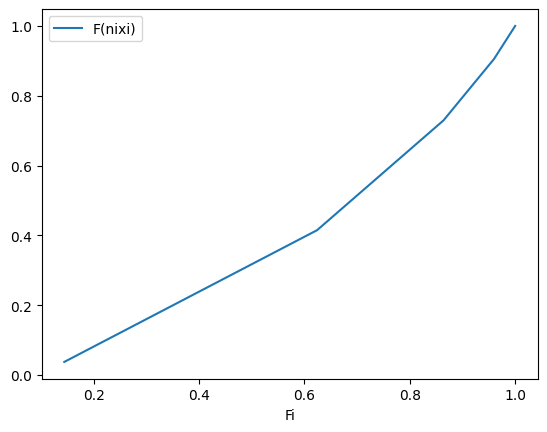

In [25]:
data.plot(kind='line',x='Fi',y='F(nixi)')

Ce code ajoute un point (0, 0) au début de deux listes (`x_data` et `y_data`) pour garantir que la ligne tracée commence depuis l'origine (0, 0). 📈

In [185]:
x=np.linspace(0,1,2)
x_data=list(data.Fi.copy())
x_data.insert(0,0)
y_data=list(data['F(nixi)'].copy())
y_data.insert(0,0)

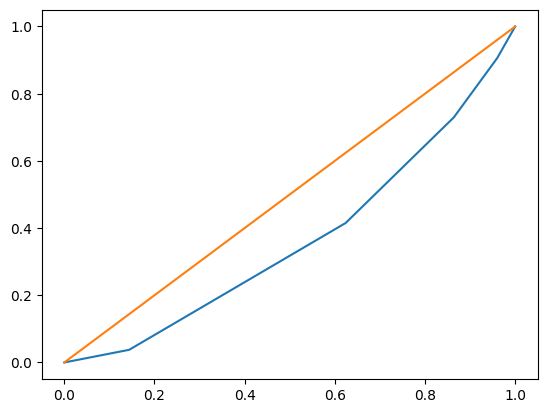

In [72]:
ptl.plot(x_data,y_data,label='dis')
ptl.plot(x,x,label='Linear')

In [159]:
data_surface=data.loc[0:,['Fi','F(nixi)']].copy()

Ce code calcule la distance entre les points sur la ligne des abscisses en soustrayant chaque valeur de la précédente dans la liste `x_data`. 📏

In [160]:
d=[x-x_data[x_data.index(x)-1] for x in x_data[1:]]

Ce code calcule la somme de la petite base et de la grande base de chaque trapèze dans une liste nommée `data_surface['petite_grands_base']`, en utilisant la liste `y_data`. 📊

In [173]:
data_surface['petite_grands_base']=[y+y_data[y_data.index(y)-1] for y in y_data[1:] ]

In [175]:
data_surface['d']=d

In [176]:
data_surface.iloc[1:,:].apply(lambda row:np.mean(row.Fi+row['F(nixi)'])*row.d,axis=1)

1    0.498765
2    0.382454
3    0.179103
4    0.080000
dtype: float64

In [177]:
data_surface['surface']=data_surface.iloc[1:,:].apply(lambda row:(row['petite_grands_base']*row.d)/2,axis=1)
data_surface['surface'].fillna(data_surface.iloc[:1,:].apply(lambda row:(row.Fi*row['F(nixi)'])/2,axis=1),inplace=True)

In [178]:
data_surface

,Fi,F(nixi),petite_grands_base,d,surface
0,0.144,0.037736,0.037736,0.144,0.002717
1,0.624,0.415094,0.452830,0.480,0.108679
2,0.864,0.729560,1.144654,0.240,0.137358
3,0.960,0.905660,1.635220,0.096,0.078491
4,1.000,1.000000,1.905660,0.040,0.038113


## L'indice de Gini

In [182]:
(0.5-data_surface.surface.sum())*2

0.2692830188679245


**Credit:**  
"12. L'indice de Gini et la concentration"  
YouTube Video by [Insert Channel Name]  
[Link to Video](https://www.youtube.com/watch?v=WGmPBgA8p7s)
